In [4]:
import re
import pandas as pd
import numpy as np
import re
import wordsegment
from wordsegment import load, segment
load()
import fasttext
model = fasttext.load_model("name_gender_model.bin")


In [59]:
import seaborn as sns

In [42]:
df=pd.read_csv('ARnames.csv')
df

,Name,Gender
0,safwah,Female
1,naveed,Male
2,zuhrah,Female
3,safuh,Male
4,naseemah,Female
...,...,...
5669,Nardeen,Female
5670,Bosy,Female
5671,Deena,Female
5672,Asia,Female


In [54]:
df.drop_duplicates(inplace=True)

In [52]:
df.nunique()

Name      5659
Gender       3
dtype: int64

In [31]:
df[df.Name.duplicated()].head(40)

,Name,Gender
1386,noor,Male
2528,hana,Female
2792,nusrat,Male
3033,nur,Female
3043,ala,Male
3369,shams,Female
3895,nibras,Female


In [ ]:
df[df.Name=='amjad

<Axes: xlabel='Gender', ylabel='count'>

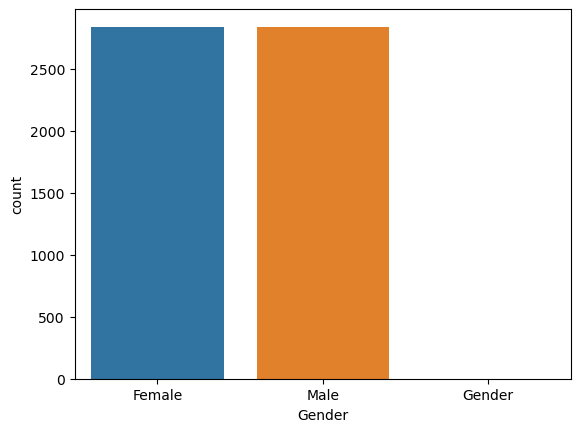

In [60]:
sns.countplot(x=df.Gender)

In [61]:


# Convert to FastText format
df["FastText"] = "__label__" + df["Gender"] + " " + df["Name"]

# Save to a .txt file for training
df["FastText"].to_csv("names.txt", index=False, header=False)


In [2]:

# Train the model
model = fasttext.train_supervised("names.txt", epoch=25, wordNgrams=1, minn=2, maxn=5)

# Save the trained model
model.save_model("name_gender_model.bin")


ValueError: names.txt cannot be opened for training!

In [27]:
# Load the trained model

# Test predictions
test_names = ["mahmoud", "mahmood", "muhamaad", "mohab", "abdelrahman",'hager','aya','layla']
for name in test_names:
    label, confidence = model.predict(name)
    print(f"{name}: {label[0].replace('__label__', '')} (Confidence: {confidence[0]:.2f})")


mahmoud: Male (Confidence: 0.99)
mahmood: Male (Confidence: 0.96)
muhamaad: Male (Confidence: 1.00)
mohab: Male (Confidence: 1.00)
abdelrahman: Male (Confidence: 0.97)
hager: Male (Confidence: 0.99)
aya: Female (Confidence: 1.00)
layla: Female (Confidence: 1.00)


In [8]:
name='abdelrahmantaha'
label, confidence = model.predict(name)
print(f"{name}: {label[0].replace('__label__', '')} (Confidence: {confidence[0]:.2f})")


abdelrahmantaha: Male (Confidence: 0.94)


In [105]:
def get_greeting(input):
    

    email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
    hr_keywords=['recruitment','career','talent','jobs','staff','hiring','hr','info','team','intern']
    email = re.search(email_pattern, input).group()  
    username=email.split('@')[0]
    for keyword in hr_keywords:
        if keyword in username.lower():
            return 'To whom it may concern'
            
    first_name=segment(username)[0]
    label, confidence = model.predict(first_name)
    gender=label[0].replace('__label__', '')
    pronouns={'Male':'Dear Mr. ','Female':'Dear Ms. '}
    greeting=pronouns[gender]+first_name
    
    return greeting
    

In [8]:
input='''WE ARE HIRING!

- Full-stack Developer ( Java & Angular ) l 3+ years of experience.
- Sales Account Manager l 3+ years of experience. ( Banking OR Agriculture )
- Senior Frontend React.js Developer l 4+ years of experience.
- Junior Frontend React.js Developer l 1+ years of experience.
- Junior QC Automation Engineer l 1+ years of experience.


If you're interested please send your updated CV to Talentacquisition.eg@panda.com.sa with the job title in the subject.

Good Luck to all applicants :)
www.asset-technology.com
title: ml engineer
fdfdf'''

In [107]:
greeting=get_greeting(input)

In [108]:
title='CCO-chief clown officer'
output=f'''{greeting},
Attached to this email, my resume for the position of {title}

I look forward to meeting you to discuss how can I be of value to your organization. 

Best regards,

Mahmoud Gamal'''
print(output)

To whom it may concern,
Attached to this email, my resume for the position of CCO-chief clown officer

I look forward to meeting you to discuss how can I be of value to your organization. 

Best regards,

Mahmoud Gamal
